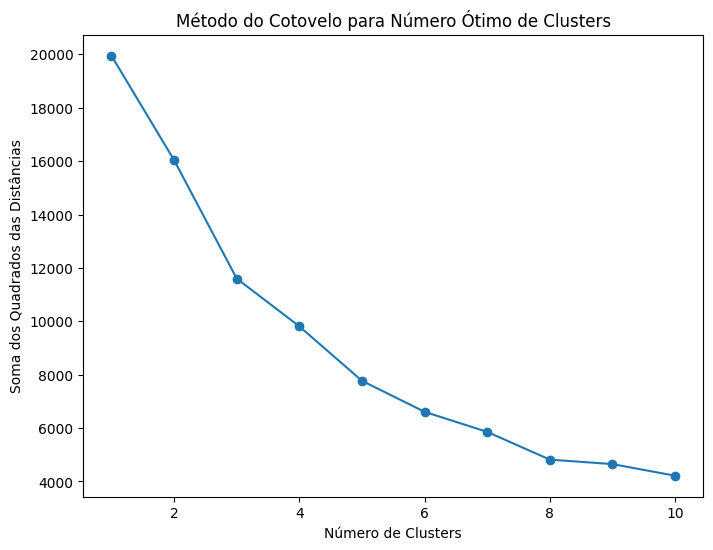

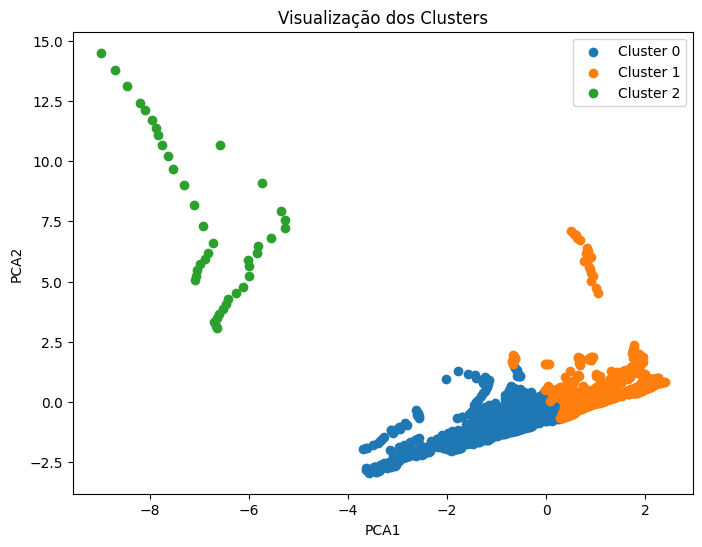

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Carregar o conjunto de dados (substitua pelo caminho correto do seu arquivo)
df = pd.read_csv('C:/Users/ROBERTA/Desktop/4CCO/TCC/TCC_2024/kmeans/base_unificada_com_casos.csv')

# Remover as colunas que não são necessárias para o agrupamento (Local e Ano)
df_numeric = df.drop(['Local', 'Ano'], axis=1)

# Tratar valores ausentes (se houver)
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Escalar (normalizar) os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Encontrar o número ideal de clusters usando o método do cotovelo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo para Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show()

# A partir do gráfico do cotovelo, selecione o número apropriado de clusters (exemplo: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduzir os dados para 2 dimensões usando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Criar um DataFrame com os componentes principais e os rótulos dos clusters
df_plot = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
df_plot['Cluster'] = df['Cluster']

# Plotar os clusters em um gráfico de dispersão
plt.figure(figsize=(8, 6))
for cluster in df_plot['Cluster'].unique():
    plt.scatter(df_plot[df_plot['Cluster'] == cluster]['PCA1'], 
                df_plot[df_plot['Cluster'] == cluster]['PCA2'], 
                label=f'Cluster {cluster}')
    
plt.title('Visualização dos Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


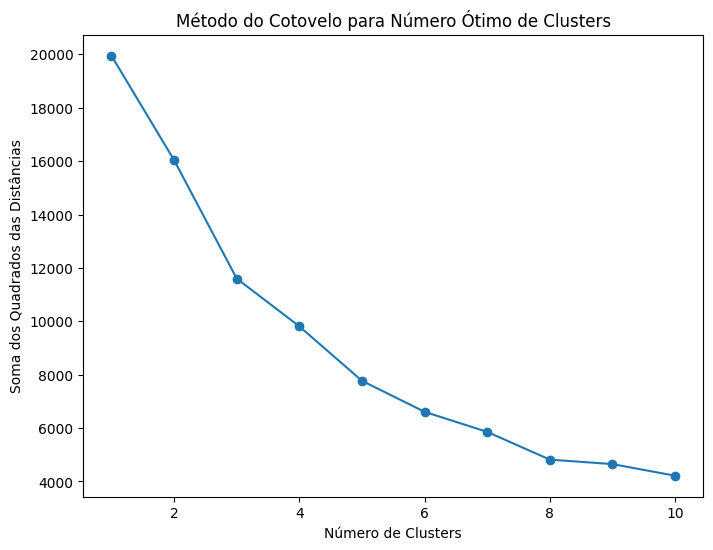

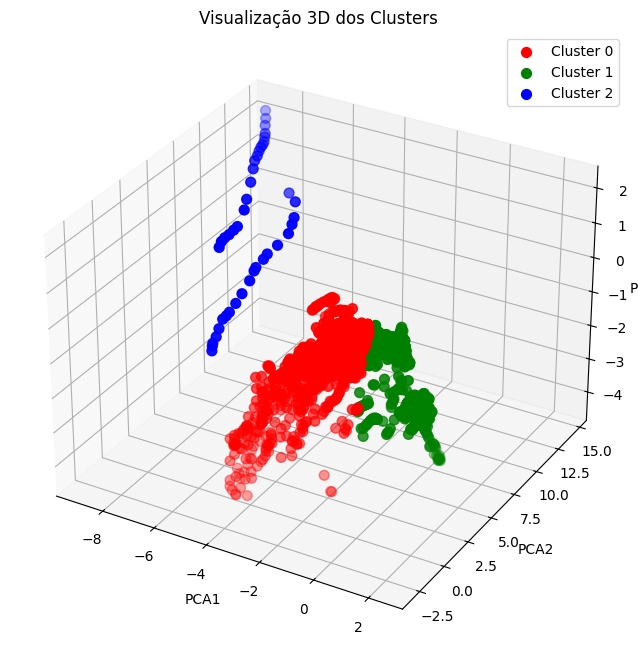

Arquivo 'dados_com_clusters.csv' salvo com sucesso!


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carregar o conjunto de dados (substitua pelo caminho correto do seu arquivo)
df = pd.read_csv('C:/Users/ROBERTA/Desktop/4CCO/TCC/TCC_2024/kmeans/base_unificada_com_casos.csv')

# Remover as colunas que não são necessárias para o agrupamento (Local e Ano)
df_numeric = df.drop(['Local', 'Ano'], axis=1)

# Tratar valores ausentes (se houver)
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Escalar (normalizar) os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Encontrar o número ideal de clusters usando o método do cotovelo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo para Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show()

# A partir do gráfico do cotovelo, selecione o número apropriado de clusters (exemplo: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduzir os dados para 3 dimensões usando PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Criar um DataFrame com os componentes principais e os rótulos dos clusters
df_plot = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_plot['Cluster'] = df['Cluster']

# Plotar os clusters em um gráfico 3D de dispersão
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Cores diferentes para cada cluster
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown']

for cluster in df_plot['Cluster'].unique():
    ax.scatter(df_plot[df_plot['Cluster'] == cluster]['PCA1'], 
               df_plot[df_plot['Cluster'] == cluster]['PCA2'], 
               df_plot[df_plot['Cluster'] == cluster]['PCA3'], 
               c=colors[cluster], label=f'Cluster {cluster}', s=50)

# Configurações de título e eixos
ax.set_title('Visualização 3D dos Clusters')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Exibir a legenda
ax.legend()
plt.show()

# Salvar o DataFrame com os clusters em um novo arquivo CSV
df.to_csv('dados_com_clusters.csv', index=False)
print("Arquivo 'dados_com_clusters.csv' salvo com sucesso!")
